In [ ]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install xlrd==1.2.0 ## old version, potential security vulnerabilities

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel('bb_agente_de_tecnologia_2022.xlsx', header=None)  

In [3]:
## Renaming columns

dataset.rename(columns={0: 'Cargo',
                   1: 'Macro.Micro',
                  2: 'Inscricao',
                  3: 'Nome',
                  4: 'D.Nasc',
                  5: 'L.Port',
                  6: 'L.Ingl',
                  7: 'Mat',
                  8: 'Atu.M.Finan',
                  9: 'Total.Conhe.Basc',
                  10: 'Prob.Estat',
                  11: 'Conhec.Ban',
                  12: 'Tec.Inf',
                  13: 'Tot.Conhec.Espec',
                  14: 'Pontos',
                  15: 'Cla.AC',
                  16: 'Cla.PCD',
                  17: 'Cla.PPP',
                  18: 'Situacao'}, inplace=True)

In [4]:
## Dropping header rows that were imported from xlsx

dataset = dataset[dataset['Cargo'] == 'AGENTE DE TECNOLOGIA']

dataset.reset_index(inplace = True)

In [5]:
## Converting to datetime

dataset['D.Nasc'] = pd.to_datetime(dataset['D.Nasc'])

In [6]:
##Extracting age from birthday data

def calculate_age(date):
    today = date.today()
    return today.year - date.year - ((today.month, today.day) < (date.month, date.day))

s = dataset["D.Nasc"]
age_list = pd.Series([])

for i in range(len(dataset.index)  ):
    age_list[i]=calculate_age(s[i])

dataset['Age'] = age_list.values

In [7]:
##Dropping unimportant data

dataset = dataset.drop('Cargo', 1)
dataset = dataset.drop('Macro.Micro', 1)
dataset = dataset.drop('Nome', 1)
dataset = dataset.drop('Inscricao', 1)
dataset = dataset.drop('index', 1)
dataset = dataset.drop('D.Nasc', 1)
dataset = dataset.drop('Cla.AC', 1)
dataset = dataset.drop('Cla.PCD', 1)
dataset = dataset.drop('Cla.PPP', 1)
dataset = dataset.drop('Situacao', 1)

In [8]:
## Correct data types

dataset['L.Port'] = pd.to_numeric(dataset['L.Port'], errors='coerce')
dataset['L.Ingl'] = pd.to_numeric(dataset['L.Ingl'], errors='coerce')
dataset['Mat'] = pd.to_numeric(dataset['Mat'], errors='coerce')
dataset['Atu.M.Finan'] = pd.to_numeric(dataset['Atu.M.Finan'], errors='coerce')
dataset['Total.Conhe.Basc'] = pd.to_numeric(dataset['Total.Conhe.Basc'], errors='coerce')
dataset['Prob.Estat'] = pd.to_numeric(dataset['Prob.Estat'], errors='coerce')
dataset['Conhec.Ban'] = pd.to_numeric(dataset['Conhec.Ban'], errors='coerce')
dataset['Tec.Inf'] = pd.to_numeric(dataset['Tec.Inf'], errors='coerce')
dataset['Tot.Conhec.Espec'] = pd.to_numeric(dataset['Tot.Conhec.Espec'], errors='coerce')
dataset['Pontos'] = pd.to_numeric(dataset['Pontos'], errors='coerce')

In [9]:
dataset.head()

,L.Port,L.Ingl,Mat,Atu.M.Finan,Total.Conhe.Basc,Prob.Estat,Conhec.Ban,Tec.Inf,Tot.Conhec.Espec,Pontos,Age
0,15.0,5,7.5,5,32.5,7.5,7.5,51.0,66.0,98.5,28
1,15.0,4,7.5,5,31.5,7.5,7.5,48.0,63.0,94.5,31
2,15.0,5,7.5,5,32.5,6.0,6.0,48.0,60.0,92.5,26
3,15.0,5,7.5,5,32.5,7.5,7.5,45.0,60.0,92.5,27
4,15.0,5,7.5,5,32.5,6.0,4.5,48.0,58.5,91.0,30


In [10]:
dataset.describe()

,L.Port,L.Ingl,Mat,Atu.M.Finan,Total.Conhe.Basc,Prob.Estat,Conhec.Ban,Tec.Inf,Tot.Conhec.Espec,Pontos,Age
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,13.784000,4.247667,5.810000,4.582667,28.424333,3.882500,5.643000,34.799000,44.324500,72.748833,28.512667
std,1.216486,0.756650,1.645236,0.600516,2.367483,1.610375,1.397749,3.991417,4.204324,4.693844,6.991528
min,7.500000,1.000000,1.500000,2.000000,20.000000,1.500000,1.500000,22.500000,36.000000,67.000000,16.000000
25%,13.500000,4.000000,4.500000,4.000000,27.000000,3.000000,4.500000,31.500000,42.000000,69.000000,24.000000
50%,13.500000,4.000000,6.000000,5.000000,28.500000,4.500000,6.000000,34.500000,43.500000,71.500000,27.000000
75%,15.000000,5.000000,7.500000,5.000000,30.000000,4.500000,6.000000,37.500000,46.500000,75.500000,32.000000
max,15.000000,5.000000,7.500000,5.000000,32.500000,7.500000,7.500000,51.000000,66.000000,98.500000,66.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   L.Port            3000 non-null   float64
 1   L.Ingl            3000 non-null   int64  
 2   Mat               3000 non-null   float64
 3   Atu.M.Finan       3000 non-null   int64  
 4   Total.Conhe.Basc  3000 non-null   float64
 5   Prob.Estat        3000 non-null   float64
 6   Conhec.Ban        3000 non-null   float64
 7   Tec.Inf           3000 non-null   float64
 8   Tot.Conhec.Espec  3000 non-null   float64
 9   Pontos            3000 non-null   float64
 10  Age               3000 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 257.9 KB


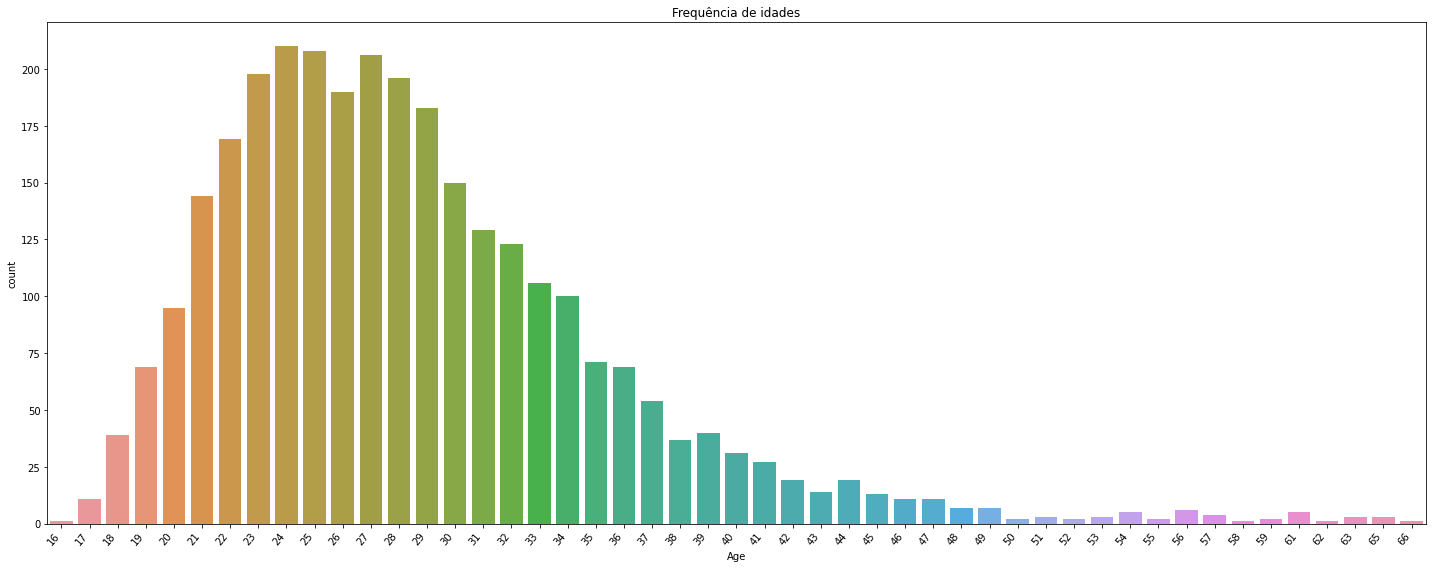

In [12]:
##Plotting idades

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['Age'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de idades')
plt.tight_layout()

In [13]:
##Plotting pontos: Redação

##plt.figure(figsize=(20,8))

##ax = sns.countplot(dataset['redação'])

##ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
##ax.set_title('Frequência de pontos: Redação')
##plt.tight_layout()

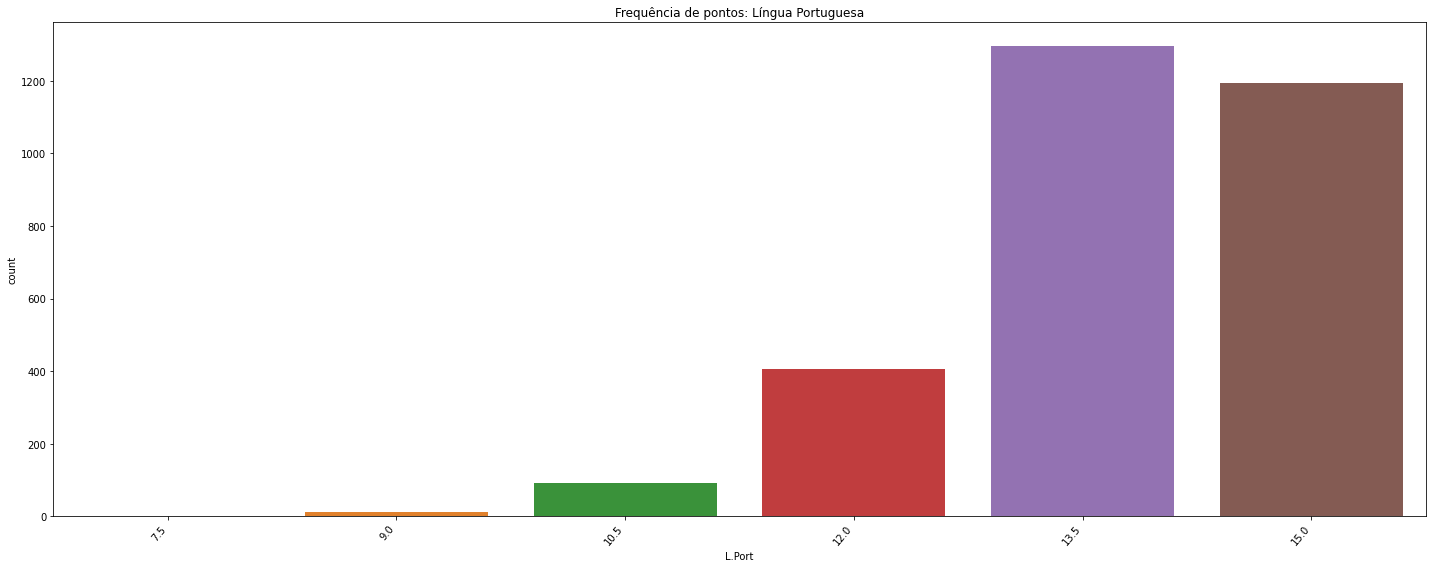

In [14]:
##Plotting pontos: Língua Portuguesa

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['L.Port'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Língua Portuguesa')
plt.tight_layout()

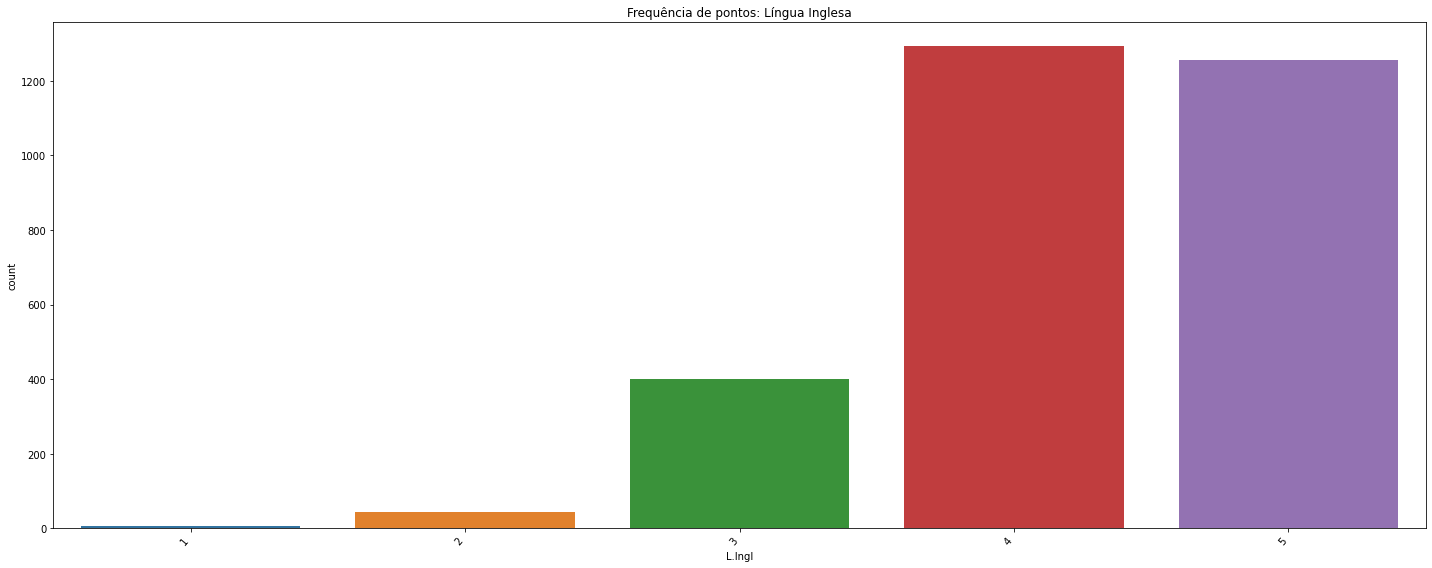

In [15]:
##Plotting pontos: Língua Inglesa

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['L.Ingl'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Língua Inglesa')
plt.tight_layout()

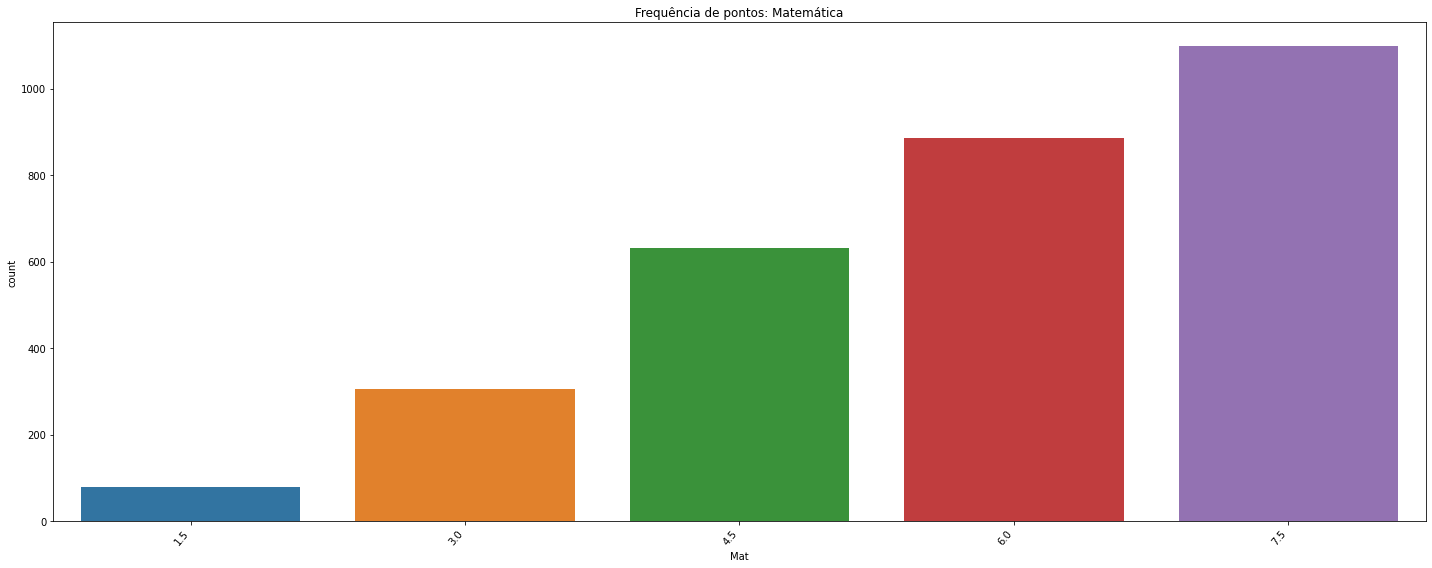

In [16]:
##Plotting pontos: Matemática

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['Mat'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Matemática')
plt.tight_layout()

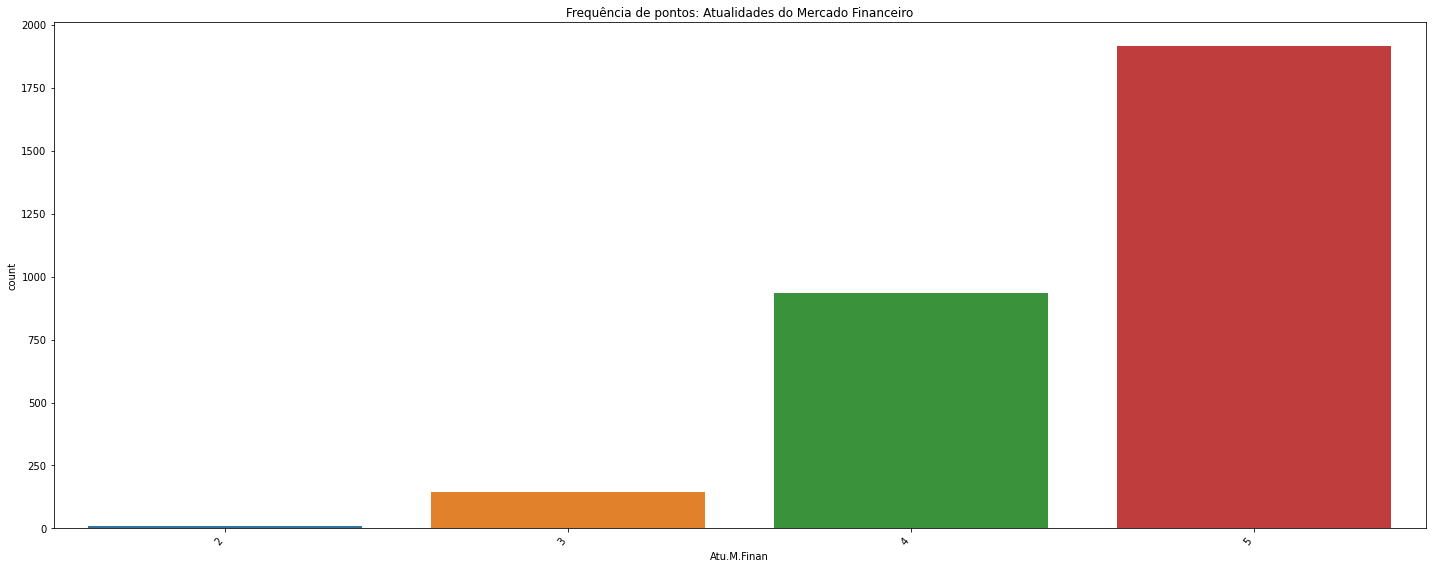

In [17]:
##Plotting pontos: Atualidades do Mercado Financeiro

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['Atu.M.Finan'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Atualidades do Mercado Financeiro')
plt.tight_layout()

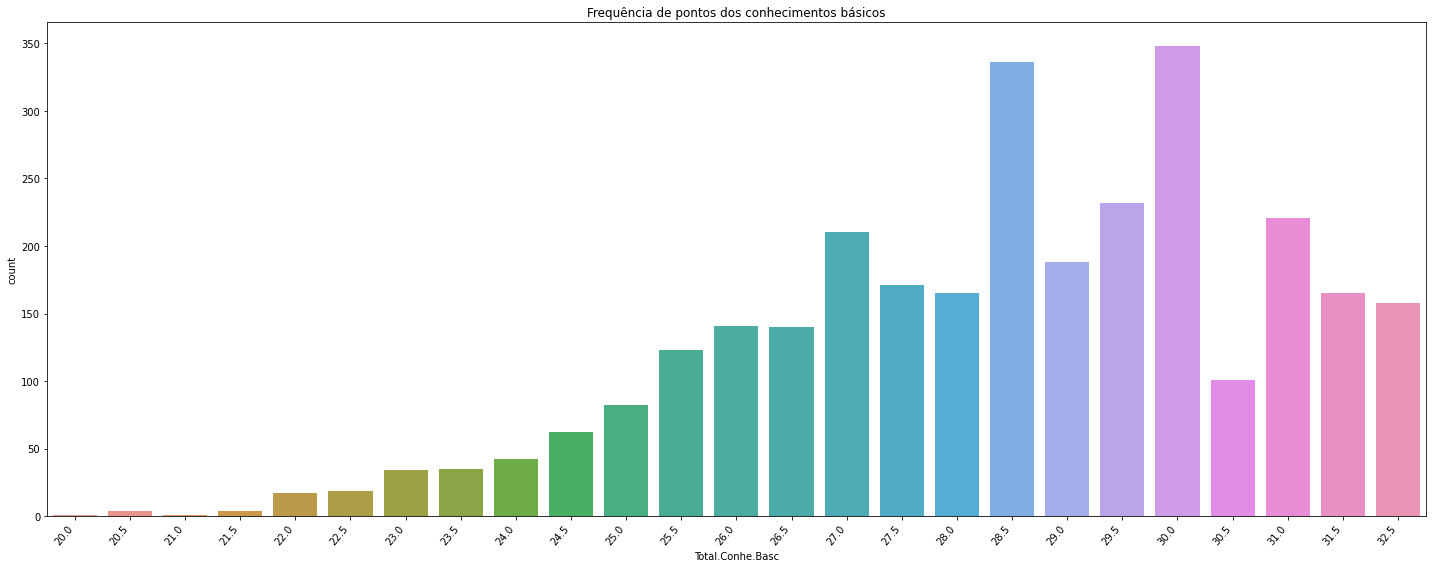

In [18]:
##Plotting pontos de conhecimentos básicos

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['Total.Conhe.Basc'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos dos conhecimentos básicos')
plt.tight_layout()

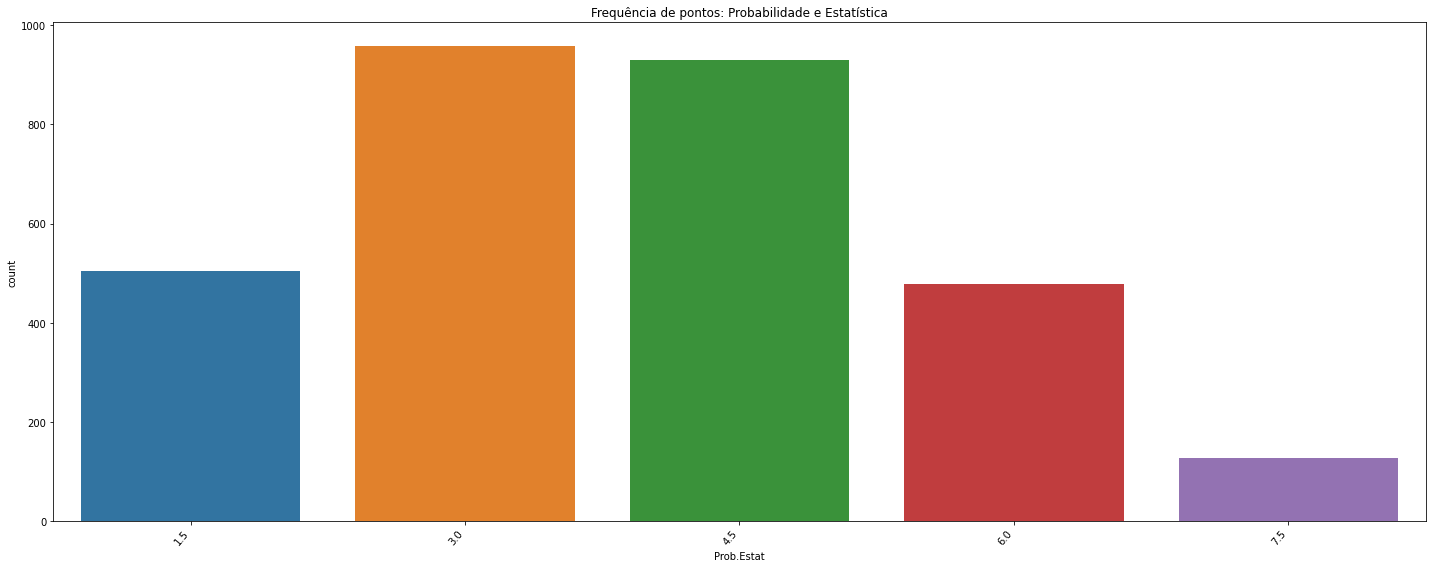

In [19]:
##Plotting pontos: Probabilidade e Estatística

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['Prob.Estat'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Probabilidade e Estatística')
plt.tight_layout()

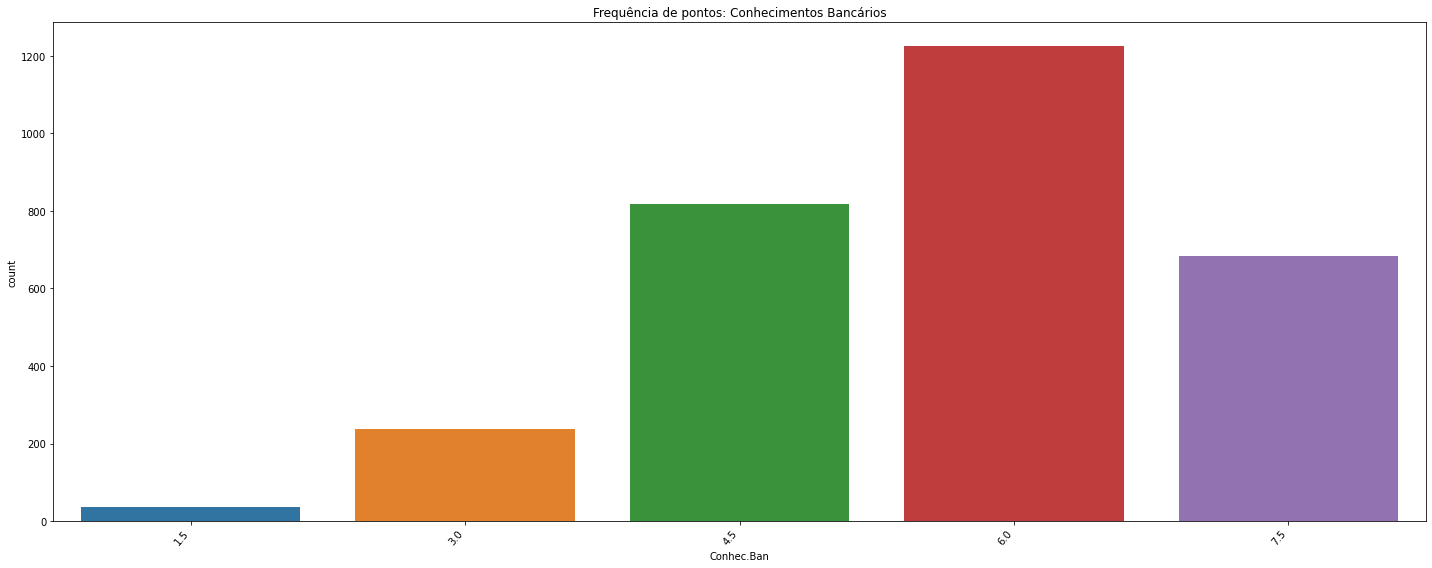

In [20]:
##Plotting pontos: Conhecimentos Bancários

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['Conhec.Ban'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Conhecimentos Bancários')
plt.tight_layout()

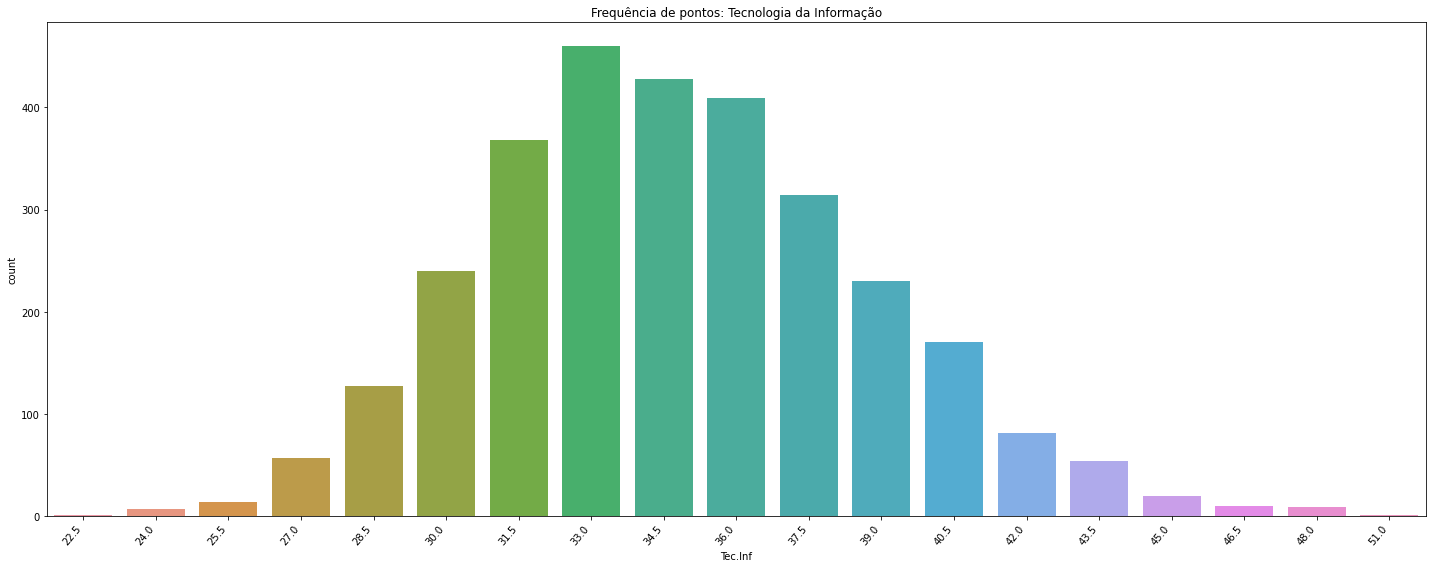

In [21]:
##Plotting pontos: Tecnologia da Informação

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['Tec.Inf'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos: Tecnologia da Informação')
plt.tight_layout()

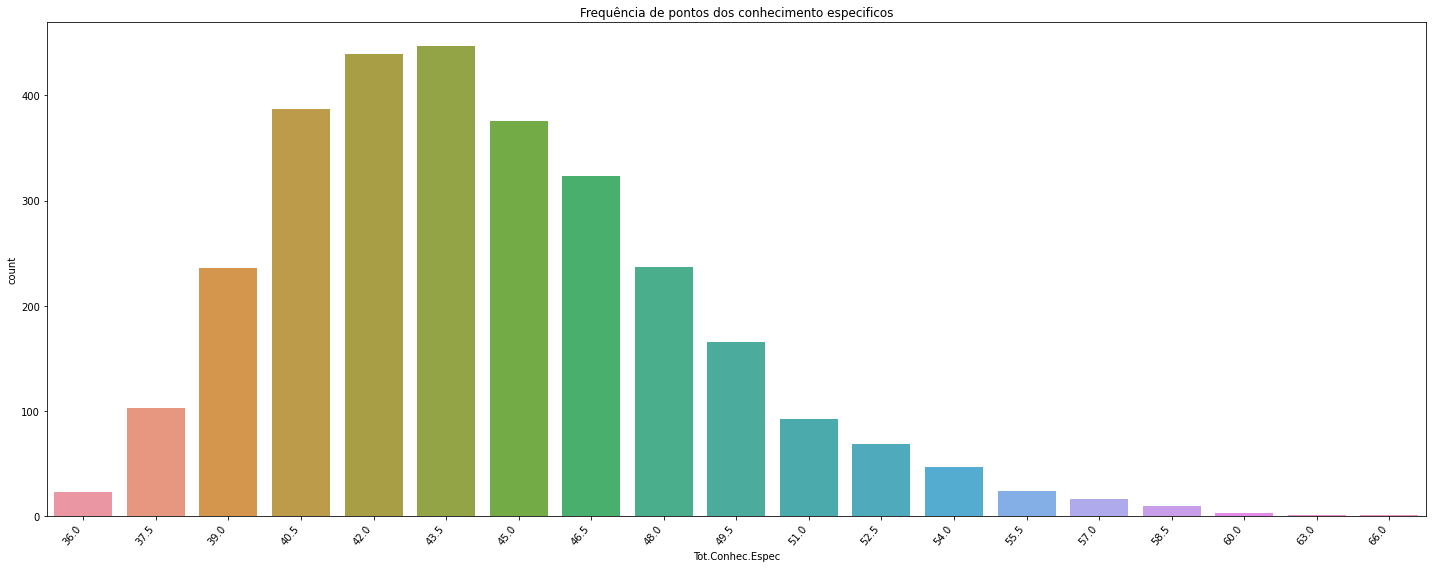

In [22]:
##Plotting pontos de conhecimento especificos

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['Tot.Conhec.Espec'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência de pontos dos conhecimento especificos')
plt.tight_layout()

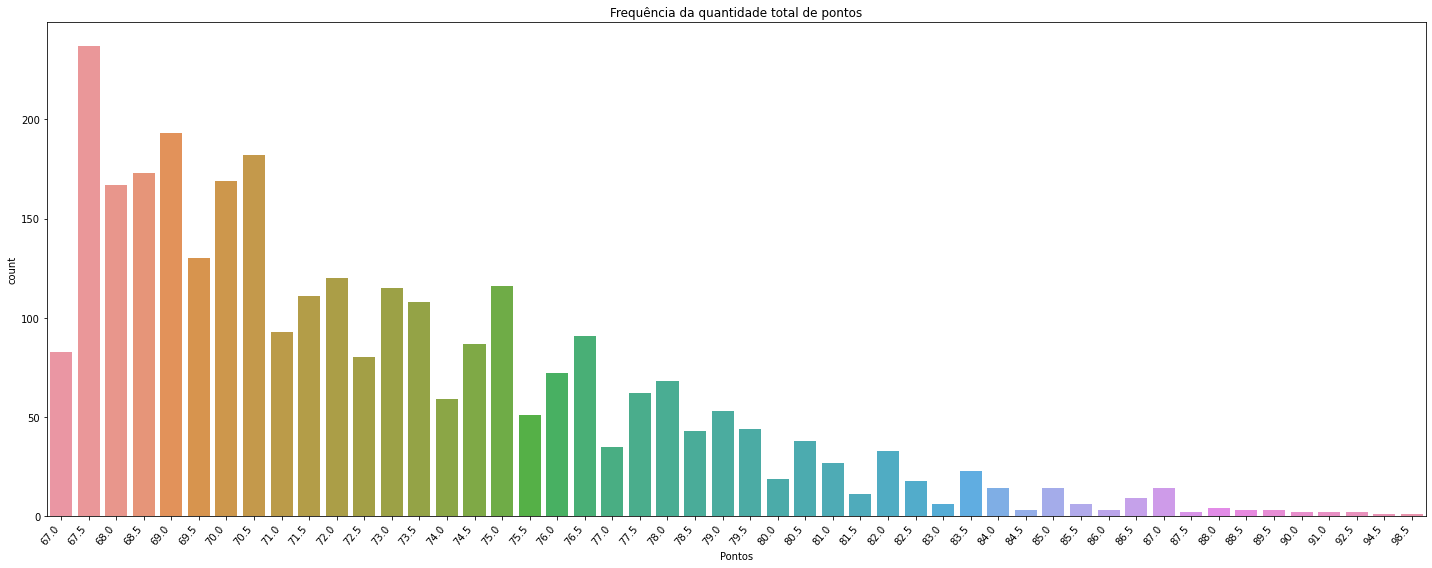

In [23]:
##Plotting quantidade total de pontos

plt.figure(figsize=(20,8))

ax = sns.countplot(dataset['Pontos'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
ax.set_title('Frequência da quantidade total de pontos')
plt.tight_layout()